# Insurance Recommendation and Customer Segmentation

Wahyu Dwi Nugraha

### **The Goal**

**Create recommendation engine which able to give recommendation about insurance product to new customer** and **Create segmentation of customer based on insurance policy.**

## 1. Data Extraction

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extract dataset
df = pd.read_csv('Data_test (1).csv', delimiter=';')
df.head()

,ID,Customer ID,City Code,Region Code,Accomodation Ownership,Insurance Type,Age,Married,Plan Code,Policy Duration,Policy Type,Policy Category,Premium Amount,Response
0,32003,81040.0,C3,3029,Rented,Individual,65.0,No,NaN,NaN,NaN,22,40171.0,1
1,32285,88349.0,C4,2583,Rented,Individual,19.0,No,X2,NaN,NaN,12,13308.0,0
2,2530,80799.0,C6,4479,Rented,Individual,24.0,No,X2,NaN,NaN,2,41781.0,0
3,43305,72065.0,C11,267,Owned,Individual,66.0,No,X3,14+,2.0,22,15383.0,0
4,15714,84093.0,C2,4534,Owned,Individual,52.0,No,X1,14+,3.0,3,43924.0,0


## 2. Preprocessing

In [3]:
# Check dataset information
df_EDA = df.copy()
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      50882 non-null  int64  
 1   Customer ID             50869 non-null  float64
 2   City Code               50882 non-null  object 
 3   Region Code             50882 non-null  int64  
 4   Accomodation Ownership  50882 non-null  object 
 5   Insurance Type          50882 non-null  object 
 6   Age                     50874 non-null  float64
 7   Married                 50882 non-null  object 
 8   Plan Code               39191 non-null  object 
 9   Policy Duration         30631 non-null  object 
 10  Policy Type             30631 non-null  float64
 11  Policy Category         50882 non-null  int64  
 12  Premium Amount          50871 non-null  float64
 13  Response                50882 non-null  int64  
dtypes: float64(4), int64(4), object(6)
mem

In [4]:
# Remove ID feature
df_EDA = df_EDA.drop(columns=['ID'], axis=1)

### a). Missing value handling

In [5]:
df_EDA.isnull().sum()

Customer ID                  13
City Code                     0
Region Code                   0
Accomodation Ownership        0
Insurance Type                0
Age                           8
Married                       0
Plan Code                 11691
Policy Duration           20251
Policy Type               20251
Policy Category               0
Premium Amount               11
Response                      0
dtype: int64

From information above, we can see there are some features with quite larger number of missing values, there are policy duration, policy type, and plan code. So i will fill this missing value.

**Handling missing value on feature plan code**

In [6]:
df_EDA['Plan Code'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Plan Code, dtype: int64

We can start with visualizing the relationship between plan code feature and other features.

In [7]:
# Define numerical and categorical features
numerical_features = df_EDA.select_dtypes(include=['float64', 'int64'])
categorical_features = df_EDA.select_dtypes(include='object')

Since policy type, policy category, and response are discrete features, we can group them into categorical features.

In [8]:
numerical_features = numerical_features.drop(columns=['Policy Type', 'Policy Category', 'Response'], axis=1)
categorical_features = pd.concat([categorical_features, df_EDA[['Policy Type', 'Policy Category', 'Response']]], axis=1)

In feature age, we can see there are outliers. It because not logical person has negative age. Also, i think in this era, there are no person reach age above 500. So i decided to remove these data.

In [9]:
# Remove outliers in feature age
df_EDA.drop(df_EDA[(df_EDA['Age'] >= 500) | (df_EDA['Age'] <= 15)].index, axis=0, inplace=True)

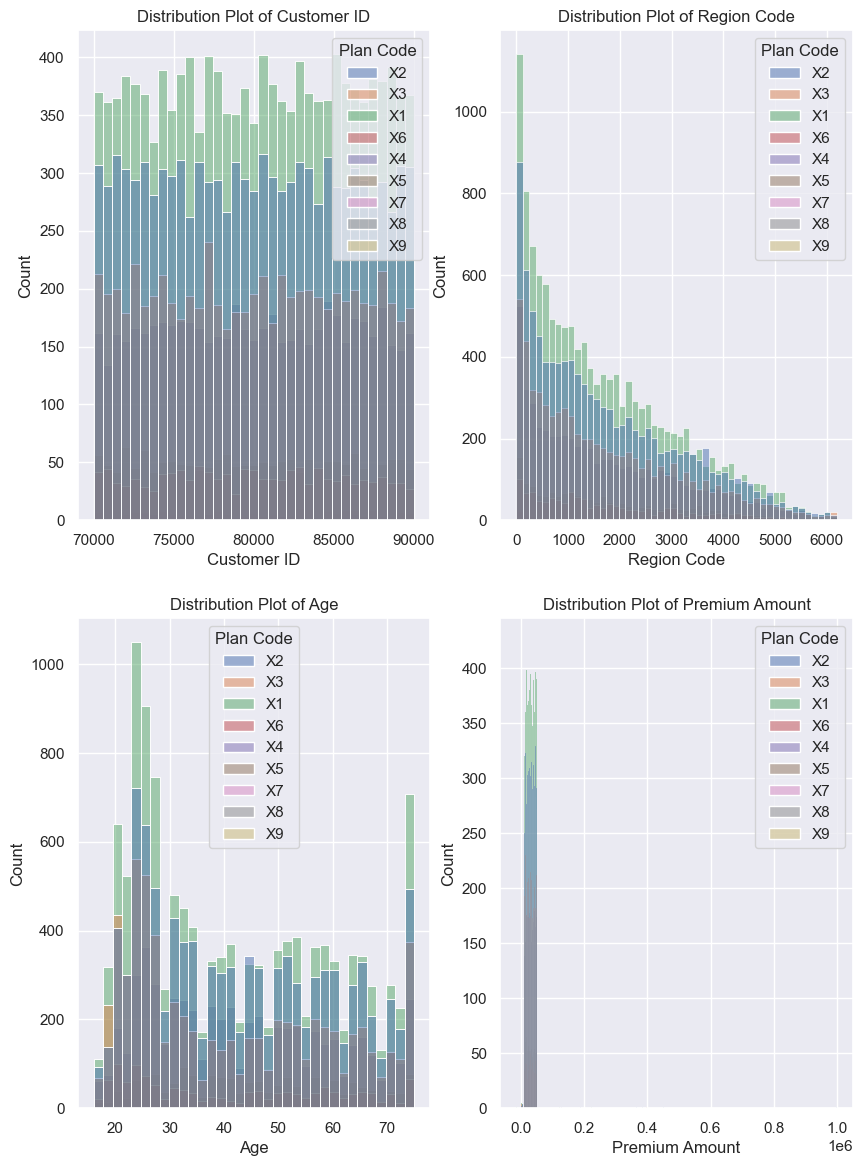

In [10]:
# Plot histogram to see relationship between plan code and other numerical features
plt.figure(figsize=(10,14))
a = 1
sns.set()

for i in numerical_features.columns:
    plt.subplot(2,2,a)
    sns.histplot(data=df_EDA, x=i, hue='Plan Code')
    plt.title(f'Distribution Plot of {i}')
    a = a + 1

From histplot above, we can see that Plan Code X1 is dominant in all of numerical features.

In [11]:
categorical_features.head()

,City Code,Accomodation Ownership,Insurance Type,Married,Plan Code,Policy Duration,Policy Type,Policy Category,Response
0,C3,Rented,Individual,No,NaN,NaN,NaN,22,1
1,C4,Rented,Individual,No,X2,NaN,NaN,12,0
2,C6,Rented,Individual,No,X2,NaN,NaN,2,0
3,C11,Owned,Individual,No,X3,14+,2.0,22,0
4,C2,Owned,Individual,No,X1,14+,3.0,3,0


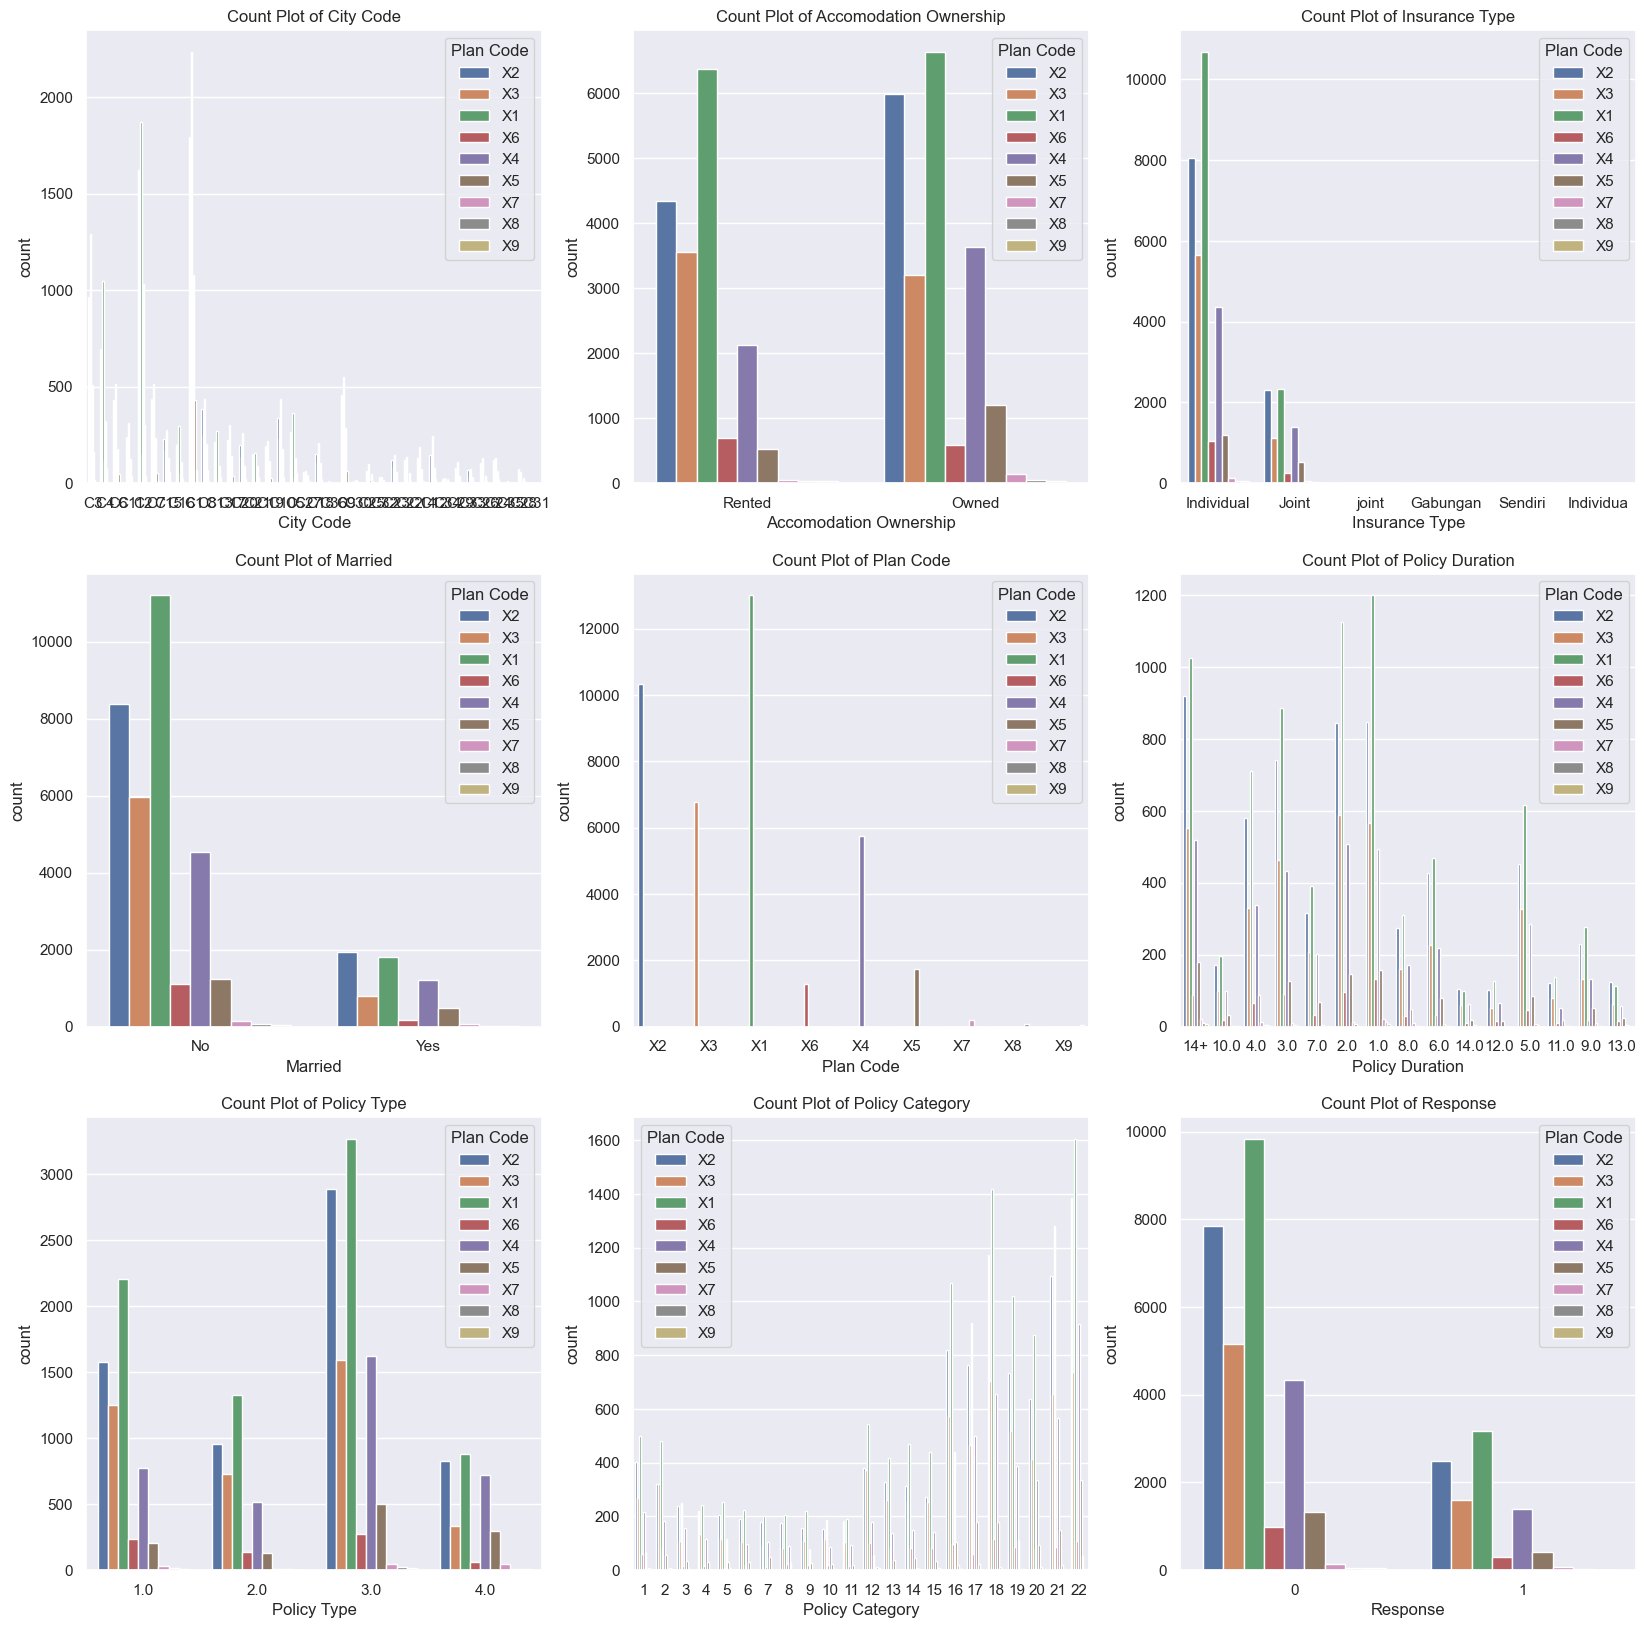

In [12]:
# Create countplot to see relationship between plan code and other categorical features
plt.figure(figsize=(20,20))
a = 1
sns.set()

for i in categorical_features.columns:
    plt.subplot(3,3,a)
    sns.countplot(data=df_EDA, x=i, hue='Plan Code')
    plt.title(f'Count Plot of {i}')
    a = a + 1

From countplot above, we can see Plan Code X1 is dominant in almost of all other categorical features.

Based on visualization of plan code on numerical and categorical features, we can see that Plan Code X1 is dominant on both other numerical and categorical features. So, i decide to fill missing value on feature Plan Code with X1

In [13]:
# Fill missing value
df_EDA['Plan Code'] = df_EDA['Plan Code'].fillna('X1')

**Fill missing value on policy type feature**

In [14]:
df_EDA['Policy Type'].value_counts()

3.0    13277
1.0     8173
2.0     5003
4.0     4173
Name: Policy Type, dtype: int64

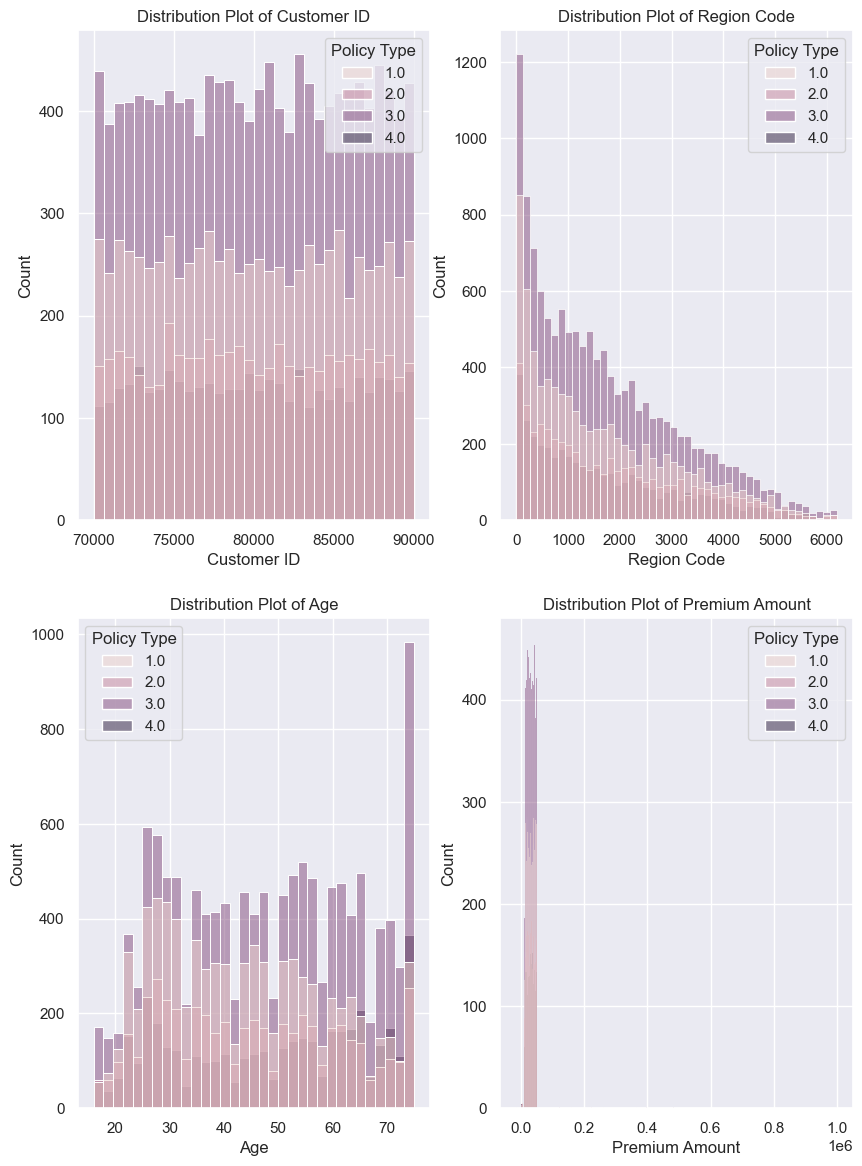

In [15]:
# Plot histogram to see relationship between policy type and other numerial features
plt.figure(figsize=(10,14))
a = 1
sns.set()

for i in numerical_features.columns:
    plt.subplot(2,2,a)
    sns.histplot(data=df_EDA, x=i, hue='Policy Type')
    plt.title(f'Distribution Plot of {i}')
    a = a + 1

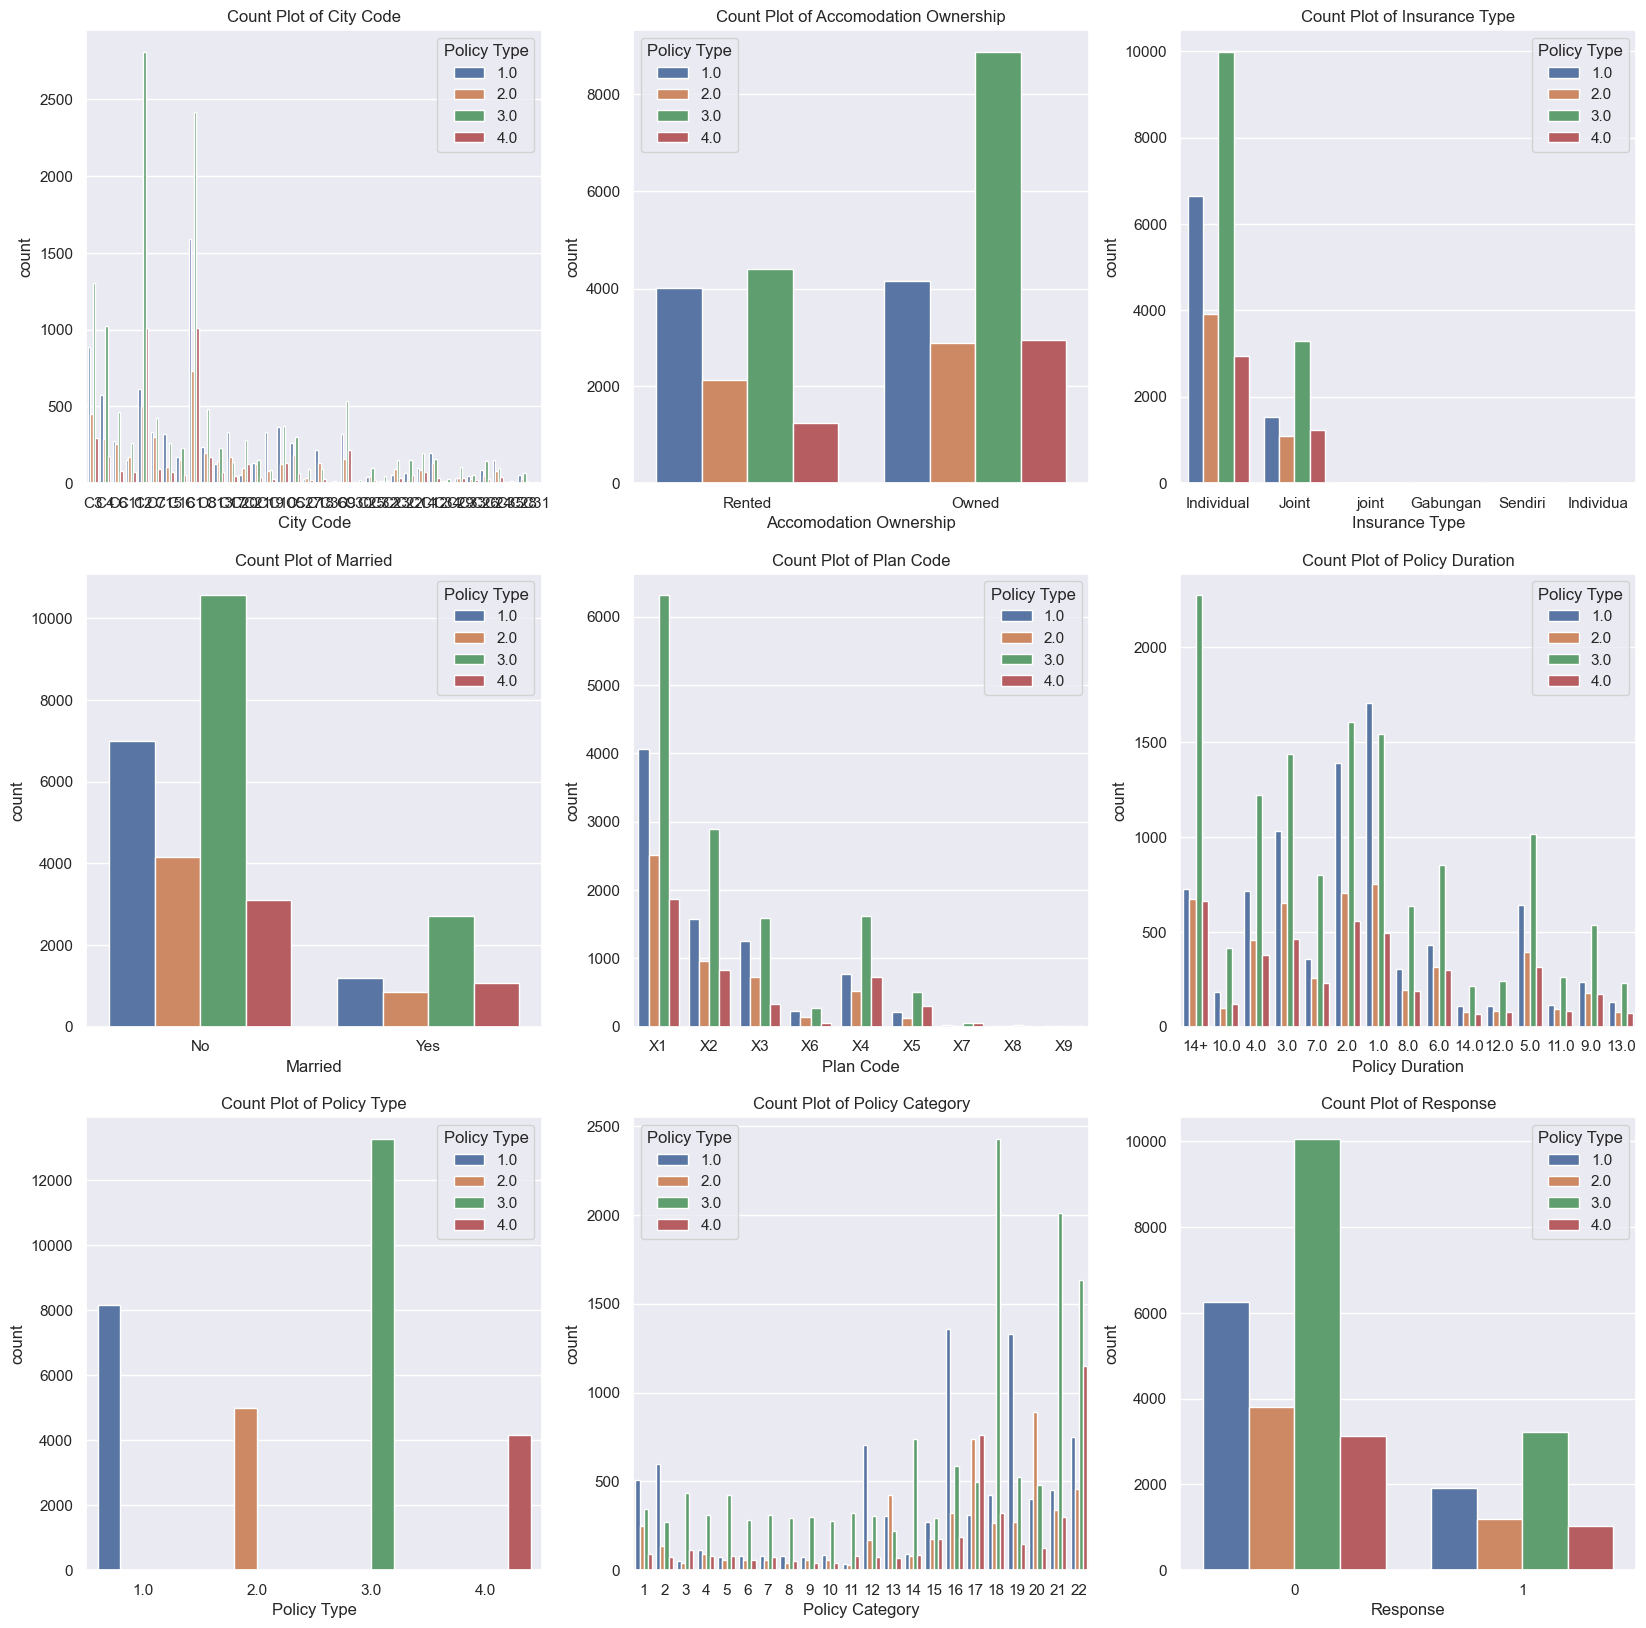

In [16]:
# Countplot with other features
plt.figure(figsize=(20,20))
a = 1
sns.set()

for i in categorical_features.columns:
    plt.subplot(3,3,a)
    sns.countplot(data=df_EDA, x=i, hue='Policy Type')
    plt.title(f'Count Plot of {i}')
    a = a + 1

Based on all other features (both numerical and categorical), we can see that policy type 3 is the most dominant. I  decide to fill missing value on policy type with type 3.

In [17]:
# Fill missing values
df_EDA['Policy Type'] = df_EDA['Policy Type'].fillna(3)

**Feature policy duration**

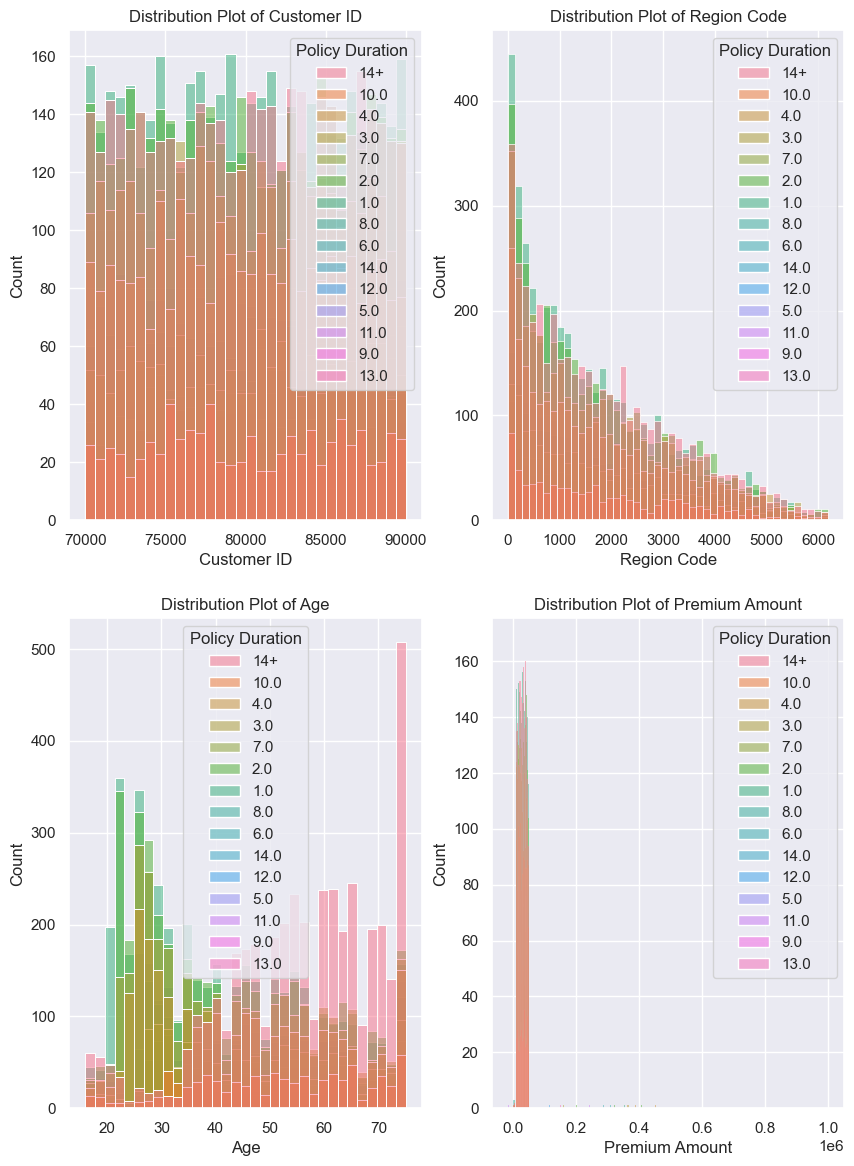

In [18]:
# Plot histogram to see relationship between policy duration and other numerial features
plt.figure(figsize=(10,14))
a = 1
sns.set()

for i in numerical_features.columns:
    plt.subplot(2,2,a)
    sns.histplot(data=df_EDA, x=i, hue='Policy Duration')
    plt.title(f'Distribution Plot of {i}')
    a = a + 1

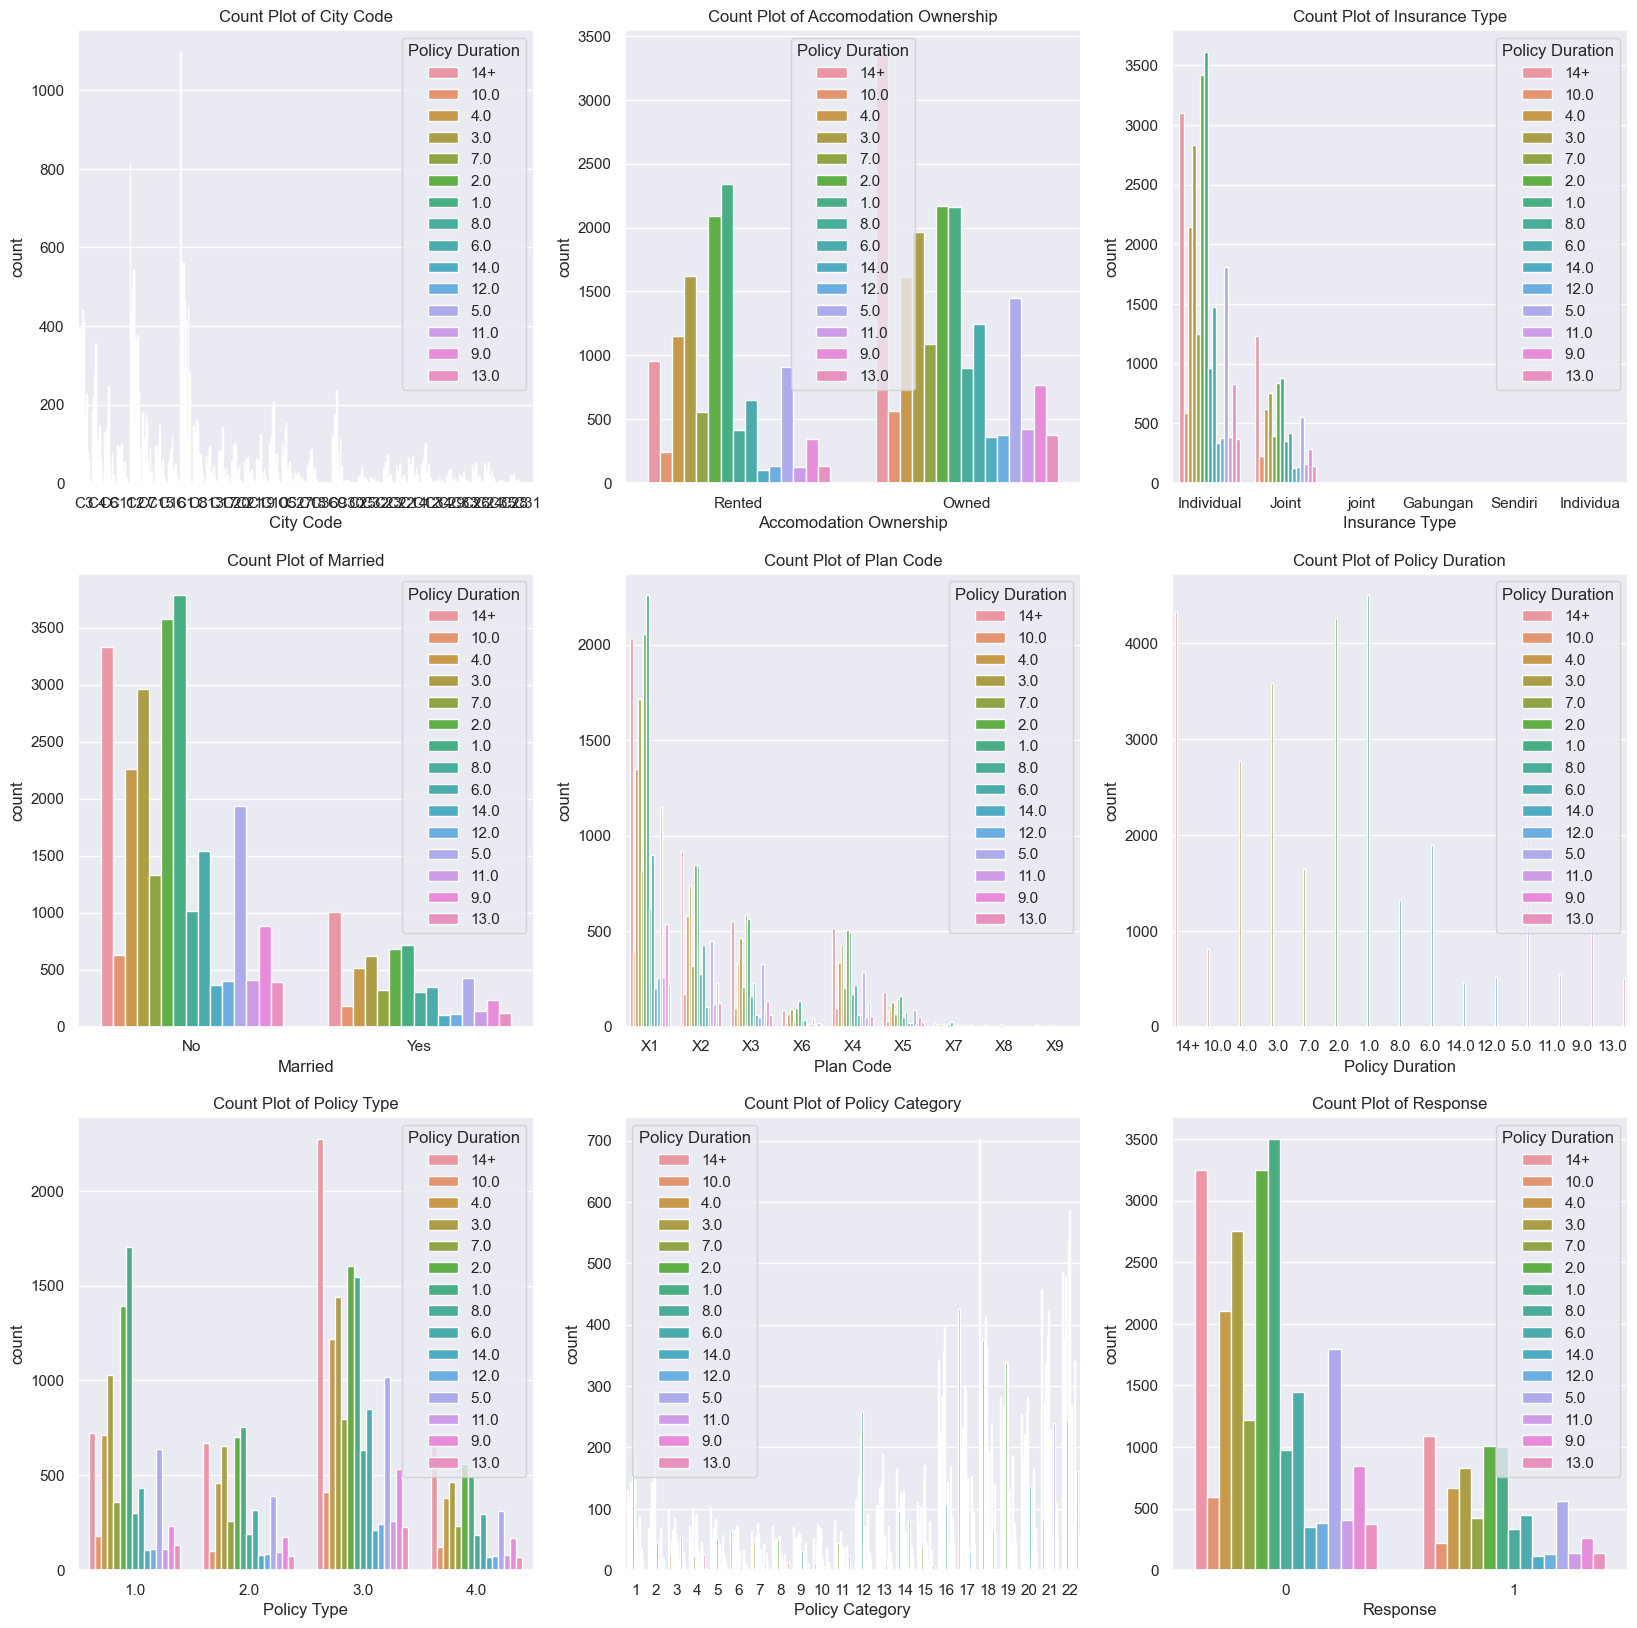

In [19]:
# Countplot with other features
plt.figure(figsize=(20,20))
a = 1
sns.set()

for i in categorical_features.columns:
    plt.subplot(3,3,a)
    sns.countplot(data=df_EDA, x=i, hue='Policy Duration')
    plt.title(f'Count Plot of {i}')
    a = a + 1

Based on countplots above, we can see policy duration categories varies with same count on 14+ and 1. So we can explore more to see realtionship between features where policy duration values are empty.

In [20]:
PD_missing = df_EDA[df_EDA['Policy Duration'].isnull()]
PD_missing

,Customer ID,City Code,Region Code,Accomodation Ownership,Insurance Type,Age,Married,Plan Code,Policy Duration,Policy Type,Policy Category,Premium Amount,Response
0,81040.0,C3,3029,Rented,Individual,65.0,No,X1,NaN,3.0,22,40171.0,1
1,88349.0,C4,2583,Rented,Individual,19.0,No,X2,NaN,3.0,12,13308.0,0
2,80799.0,C6,4479,Rented,Individual,24.0,No,X2,NaN,3.0,2,41781.0,0
6,83205.0,C15,3721,Owned,Joint,56.0,Yes,X4,NaN,3.0,21,23437.0,0
7,75066.0,C16,329,Rented,Individual,19.0,No,X6,NaN,3.0,21,10569.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50872,88334.0,C3,5288,Owned,Individual,49.0,No,X1,NaN,3.0,18,21276.0,1
50873,78046.0,C13,5201,Rented,Individual,47.0,No,X2,NaN,3.0,1,12386.0,0
50876,73419.0,C18,523,Rented,Individual,28.0,No,X1,NaN,3.0,12,47478.0,1
50877,83742.0,C1,1801,Owned,Individual,75.0,No,X1,NaN,3.0,18,22505.0,0


In [21]:
PD_missing['Policy Type'].value_counts()

3.0    20251
Name: Policy Type, dtype: int64

In [22]:
PD_missing['Age'].describe()

count    20244.000000
mean        37.205493
std         16.953836
min         16.000000
25%         23.000000
50%         30.000000
75%         50.000000
max         75.000000
Name: Age, dtype: float64

In [23]:
PD_missing['Married'].value_counts()

No     17650
Yes     2601
Name: Married, dtype: int64

In [24]:
PD_missing['Accomodation Ownership'].value_counts()

Rented    11144
Owned      9107
Name: Accomodation Ownership, dtype: int64

From histogram and countplot, also from statistical information on 4 features above (because there are significant differences between values in these features, for example on feature Age, on the range 0 ~ 40 policy duration 1 is dominant, on the range 40+ policy duration 14+ is dominant) we can see that policy duration 1 is quite dominant than policy 14+ while in another condition like on relationship with policy type, policy duration 14+ is dominant. But in overall, we can consider policy duration 1 to fill this missing value.

In [25]:
# Fill missing values
df_EDA['Policy Duration'] = df_EDA['Policy Duration'].fillna('1.0')

In [26]:
df_EDA.isnull().sum()

Customer ID               13
City Code                  0
Region Code                0
Accomodation Ownership     0
Insurance Type             0
Age                        8
Married                    0
Plan Code                  0
Policy Duration            0
Policy Type                0
Policy Category            0
Premium Amount            11
Response                   0
dtype: int64

There are very less data missing in remaining features. I think we can just drop these missing value.

In [27]:
# Drop remaining missing value
df_EDA = df_EDA.dropna()

In [28]:
df_EDA.isnull().sum()

Customer ID               0
City Code                 0
Region Code               0
Accomodation Ownership    0
Insurance Type            0
Age                       0
Married                   0
Plan Code                 0
Policy Duration           0
Policy Type               0
Policy Category           0
Premium Amount            0
Response                  0
dtype: int64

Our data is clean and ready for next processing step.

### b). Check Outliers

In [29]:
# Copy dataframe
df_outliers = df_EDA.copy()

/var/folders/mz/_h5zh2w56xncy1rm6lq19vk80000gn/T/ipykernel_28493/3881828367.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_outliers[i])
/var/folders/mz/_h5zh2w56xncy1rm6lq19vk80000gn/T/ipykernel_28493/3881828367.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_outliers[i])


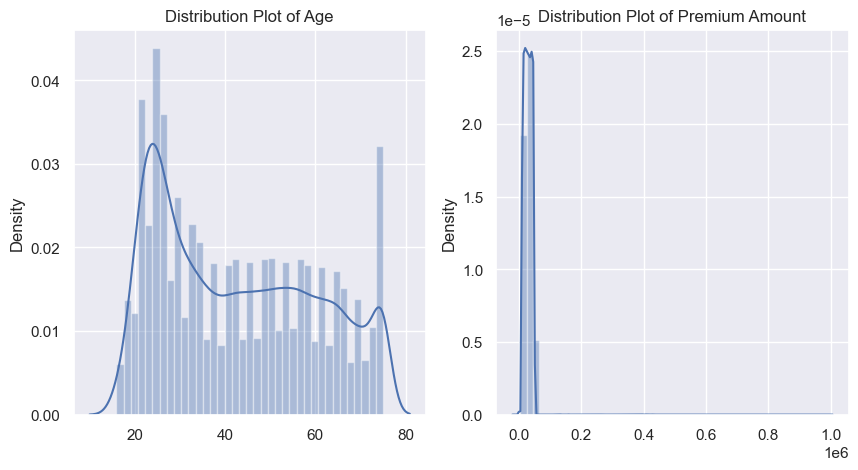

In [30]:
# Check outliers for numerical features with density plot
plt.figure(figsize=(10,5))
a = 1
sns.set()

numerical_columns = ['Age', 'Premium Amount']

for i in numerical_columns:
    plt.subplot(1, 2, a)
    sns.distplot(x=df_outliers[i])
    plt.title(f'Distribution Plot of {i}')
    a = a + 1

We can see that:
- The distribution of feature Age is quite normal. It is because i cleaned outliers before such Age 1000, Age with negative values, etc.
- The distribution of premium amount is skew, so we need to clean outliers in this feature.

<Axes: xlabel='Premium Amount'>

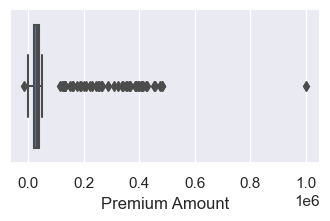

In [31]:
# Check outliers with boxplot
plt.figure(figsize=(4,2))
sns.boxplot(x=df_outliers['Premium Amount'])

In [32]:
# Check values distribution on premium amount feature
df_outliers['Premium Amount'].describe()

count      50845.000000
mean       30209.720858
std        15258.067888
min       -15002.000000
25%        19952.000000
50%        29874.000000
75%        40009.000000
max      1000000.000000
Name: Premium Amount, dtype: float64

In [33]:
df_outliers[df_outliers['Premium Amount'] > 100000]

,Customer ID,City Code,Region Code,Accomodation Ownership,Insurance Type,Age,Married,Plan Code,Policy Duration,Policy Type,Policy Category,Premium Amount,Response
353,87389.0,C2,1155,Owned,Individual,55.0,No,X2,4.0,4.0,21,389680.0,0
2228,78147.0,C1,1587,Owned,Individual,49.0,No,X2,2.0,2.0,20,407398.0,0
3168,77320.0,C6,195,Owned,Joint,30.0,Yes,X1,1.0,3.0,20,353547.0,0
3522,75712.0,C33,657,Owned,Individual,72.0,No,X1,6.0,3.0,14,286735.0,0
3874,81619.0,C10,5485,Rented,Joint,40.0,Yes,X4,1.0,3.0,17,230331.0,0
4564,89967.0,C18,853,Rented,Individual,59.0,No,X3,1.0,3.0,22,389239.0,0
5005,83893.0,C28,4277,Rented,Individual,61.0,No,X1,1.0,3.0,2,265802.0,1
6251,75627.0,C19,3990,Rented,Individual,32.0,No,X4,3.0,2.0,1,127188.0,0
9549,76653.0,C5,3857,Owned,Individual,30.0,No,X1,1.0,3.0,5,410952.0,1
10464,83102.0,C9,103,Owned,Individual,45.0,No,X6,8.0,3.0,22,133373.0,0


Based on boxplot and statistical analysis, we can see there are only less number of data with premium amount above 100000. Also, there are some data with negative premium amount values which is impossible. I think we can drop these data because these data indicating the outliers and can affect our model performance.

In [34]:
# Remove outliers on premium amount feature
df_outliers = df_outliers.drop(df_outliers[(df_outliers['Premium Amount'] >= 100000) | (df_outliers['Premium Amount'] <= 0)].index, axis=0)

/var/folders/mz/_h5zh2w56xncy1rm6lq19vk80000gn/T/ipykernel_28493/184231868.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_outliers[i])
/var/folders/mz/_h5zh2w56xncy1rm6lq19vk80000gn/T/ipykernel_28493/184231868.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_outliers[i])


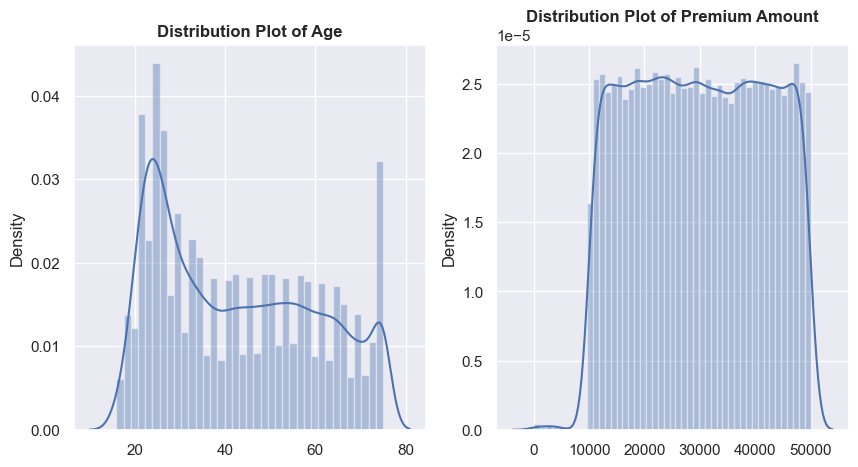

In [35]:
# Check distribution again
plt.figure(figsize=(10,5))
a = 1
sns.set()

numerical_columns = ['Age', 'Premium Amount']

for i in numerical_columns:
    plt.subplot(1, 2, a)
    sns.distplot(x=df_outliers[i])
    plt.title(f'Distribution Plot of {i}', weight='bold')
    a = a + 1

The outliers are removed from our data. So we can continue to next step.

**Check categoical featuers**

In [36]:
categorical_features = df_outliers.select_dtypes(include='object')
categorical_features.head()

,City Code,Accomodation Ownership,Insurance Type,Married,Plan Code,Policy Duration
0,C3,Rented,Individual,No,X1,1.0
1,C4,Rented,Individual,No,X2,1.0
2,C6,Rented,Individual,No,X2,1.0
3,C11,Owned,Individual,No,X3,14+
4,C2,Owned,Individual,No,X1,14+


In [37]:
# Check unique values on each feature
for i in categorical_features.columns:
    print(f"Unique values in feature {i} = {categorical_features[i].unique()}")
    print('\n')

Unique values in feature City Code = ['C3' 'C4' 'C6' 'C11' 'C2' 'C7' 'C15' 'C16' 'C1' 'C8' 'C13' 'C17' 'C20'
 'C21' 'C19' 'C10' 'C5' 'C27' 'C18' 'C36' 'C9' 'C30' 'C25' 'C32' 'C23'
 'C22' 'C14' 'C12' 'C34' 'C29' 'C33' 'C26' 'C24' 'C35' 'C28' 'C31']


Unique values in feature Accomodation Ownership = ['Rented' 'Owned']


Unique values in feature Insurance Type = ['Individual' 'Joint' 'joint' 'Gabungan' 'Sendiri' 'Individua']


Unique values in feature Married = ['No' 'Yes']


Unique values in feature Plan Code = ['X1' 'X2' 'X3' 'X6' 'X4' 'X5' 'X7' 'X8' 'X9']


Unique values in feature Policy Duration = ['1.0' '14+' '10.0' '4.0' '3.0' '7.0' '2.0' '8.0' '6.0' '14.0' '12.0'
 '5.0' '11.0' '9.0' '13.0']




Based on unique values in every categorical features above, we can see in feature insurance type there are unique values which have similar meaning with each others. So we can handle this.

In [38]:
# Replace values on insurance type feature
replace_type = {'joint' : 'Joint',
               'Gabungan' : 'Joint',
               'Sendiri' : 'Individual',
               'Individua' : 'Individual'}

df_outliers['Insurance Type'] = df_outliers['Insurance Type'].replace(replace_type)

In [39]:
df_outliers['Insurance Type'].value_counts()

Individual    40465
Joint         10327
Name: Insurance Type, dtype: int64

In [40]:
df['Insurance Type'].value_counts()

Individual    40533
Joint         10343
Gabungan          2
Sendiri           2
joint             1
Individua         1
Name: Insurance Type, dtype: int64

**Our data is ready to use in the next step !**

## 3. Recommender System

**Type of recommender system**:
- Collaborative filtering : create recommendation engine based on user interaction with product and recommend those products which user used to other related user.
- Content based filtering : create recommendation engine based on user or product with their attributes.

In email, one of the tasks is to create recommendation engine for new customer. Based on this, for *new customer*, i think *new customer* doesn't have any historical data with company insurance product, so i think i can't use collaborative filtering because new customer doesn't have any historical interaction with existing insurance products. So i decide to use **content based filtering** with these steps :
- Get relationship between new customer and other customers by looking for similarites based on user attributes.
- Recommend insurance product used by similar customer to new customer.

In [41]:
# Check dataframe
df_modeling = df_outliers.copy()
df_check = df_outliers.copy()

This dataset also contain response feature which mean the user accept/buy insurance product or not (with value 1 or 0). I think we can create recommender system with response 1 because it is not suitable if i use the data while people reject insurance product.

In [42]:
df_modeling = df_modeling[df_modeling['Response'] == 1]
df_check = df_check[df_check['Response'] == 1]

Since we want to create user profile based on user attributes, so i decide to consider features **region code, age, city code, accomodation ownership, and married** as user attributes.

In [43]:
# Define function to capture unique values
def unique_capture(feature_name):
    name = df_modeling[feature_name].unique().reshape(df_modeling[feature_name].unique().shape[0], 1)
    return name

In [44]:
# Unique values of feature city code, accomodation, and married
citycode = unique_capture('City Code')
accomodation = unique_capture('Accomodation Ownership')
married = unique_capture('Married')

In [45]:
# Label encoding
from sklearn.preprocessing import OneHotEncoder
OH_city = OneHotEncoder()
OH_accomodation = OneHotEncoder()
OH_married = OneHotEncoder()

# Fit
OH_city.fit(citycode)
OH_accomodation.fit(accomodation)
OH_married.fit(married)

# Transform
encoded_city = OH_city.transform(df_modeling['City Code'].values.reshape(df_modeling['City Code'].shape[0],1)).toarray()
encoded_accomodation = OH_accomodation.transform(df_modeling['Accomodation Ownership'].values.reshape(df_modeling['Accomodation Ownership'].shape[0],1)).toarray()
encoded_married = OH_married.transform(df_modeling['Married'].values.reshape(df_modeling['Married'].shape[0],1)).toarray()

# Create dataframe for each encoded feature
encoded_city = pd.DataFrame(encoded_city, columns=OH_city.categories_[0])
encoded_accomodation = pd.DataFrame(encoded_accomodation, columns=OH_accomodation.categories_[0])
encoded_married = pd.DataFrame(encoded_married, columns=OH_married.categories_[0])

# Concate all categorical encoded dataframe into 1 dataframe
categorical_encoded = pd.concat([encoded_city, encoded_accomodation, encoded_married], axis=1)
categorical_encoded.head()

,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,C4,C5,C6,C7,C8,C9,Owned,Rented,No,Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [46]:
# Concat numerical and categorical features
df_modeling = pd.concat([df_modeling[['Customer ID', 'Region Code', 'Age']].reset_index(), categorical_encoded], axis=1)
df_modeling = df_modeling.drop(columns=['index'], axis=1)

In [47]:
df_modeling = df_modeling.set_index('Customer ID')
df_modeling.head()

,Region Code,Age,C1,C10,C11,C12,C13,C14,C15,C16,...,C4,C5,C6,C7,C8,C9,Owned,Rented,No,Yes
Customer ID,,,,,,,,,,,,,,,,,,,,,
81040.0,3029,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
85210.0,2356,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
88044.0,1198,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
84016.0,2445,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
72222.0,1480,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [48]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_modeling)
df_scaled

array([[0.48893912, 0.83050847, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.38026804, 0.71186441, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19328274, 0.50847458, 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.42838689, 0.72881356, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.8537058 , 0.55932203, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08428871, 0.20338983, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [49]:
# Create CSR format for sparse matrix
from scipy.sparse import csr_matrix

df_matrix = csr_matrix(df_scaled)
print(df_matrix)

  (0, 0)	0.48893912481834334
  (0, 1)	0.8305084745762712
  (0, 24)	1.0
  (0, 39)	1.0
  (0, 40)	1.0
  (1, 0)	0.38026804456644603
  (1, 1)	0.7118644067796611
  (1, 24)	1.0
  (1, 38)	1.0
  (1, 40)	1.0
  (2, 0)	0.1932827385758114
  (2, 1)	0.5084745762711864
  (2, 35)	1.0
  (2, 39)	1.0
  (2, 40)	1.0
  (3, 0)	0.39463910867108026
  (3, 1)	0.3898305084745763
  (3, 36)	1.0
  (3, 38)	1.0
  (3, 41)	1.0
  (4, 0)	0.23881802034555144
  (4, 1)	0.28813559322033894
  (4, 13)	1.0
  (4, 39)	1.0
  (4, 40)	1.0
  :	:
  (12184, 0)	0.5727434199903116
  (12184, 1)	0.4745762711864407
  (12184, 12)	1.0
  (12184, 38)	1.0
  (12184, 41)	1.0
  (12185, 0)	0.6371709995155822
  (12185, 1)	0.3220338983050847
  (12185, 22)	1.0
  (12185, 39)	1.0
  (12185, 40)	1.0
  (12186, 0)	0.42838688842241246
  (12186, 1)	0.728813559322034
  (12186, 24)	1.0
  (12186, 39)	1.0
  (12186, 40)	1.0
  (12187, 0)	0.853705796867431
  (12187, 1)	0.5593220338983051
  (12187, 24)	1.0
  (12187, 38)	1.0
  (12187, 40)	1.0
  (12188, 0)	0.0842887130631

In [50]:
# Apply nearest negihbors to calculate cosine similarites between data
from sklearn.neighbors import NearestNeighbors

model_neighbors = NearestNeighbors(metric='cosine')
model_neighbors.fit(df_matrix)

NearestNeighbors(metric='cosine')

In [51]:
# Reset index of dataframe
df_modeling.reset_index(inplace=True)

In [52]:
# Create function for new customer and his/her attributes, and recommend insurance product
def new_customer(region_code, age, city_code, accomodation, married):
    CC = np.array(city_code).reshape(1,1)
    AO = np.array(accomodation).reshape(1,1)
    MR = np.array(married).reshape(1,1)
    
    CC = OH_city.transform(CC).toarray()
    AO = OH_accomodation.transform(AO).toarray()
    MR = OH_married.transform(MR).toarray()
    
    hstack_values = np.hstack((np.array(region_code), np.array(age), 
                        CC.flatten(), AO.flatten(), MR.flatten()))
    
    hstack_names = np.hstack((['Region Code'], ['Age'], OH_city.categories_[0],
                             OH_accomodation.categories_[0],
                             OH_married.categories_[0]))
    
    df_hstack = pd.DataFrame(hstack_values.reshape(1, hstack_values.shape[0]),
                             columns=hstack_names)
    
    df_hstack_scaled = scaler.transform(df_hstack)
    
    distance, index = model_neighbors.kneighbors(df_hstack_scaled.reshape(1,-1),
                                               n_neighbors=6)
    
    
    print('The similar customers :\n')

    for i in range(0, len(index.flatten())):
        print(f"Index {index.flatten()[i]} Customer ID ==> {df_modeling['Customer ID'].iloc[index.flatten()[i]]} with distance {distance.flatten()[i]}")

    print('\n')
    print(f"We choose customer ID {df_check.iloc[index.flatten()[0]].values[0]} as most similar customer !")
    print('\n')
    
    policy_attributes = df_check[['Policy Type', 'Policy Category']].iloc[index.flatten()[0]].values
    
    print('The Recommendation for new customer : \n')
    print(f"Policy Type {policy_attributes[0]}, Policy Category {policy_attributes[1]}")

**Testing with new customer attributes data**

Suppose there is new customer with region code 30, age 60, city code C1, accomodation ownership rented, and no married

In [53]:
new_customer(30, 60, 'C1', 'Rented', 'No')

The similar customers :

Index 719 Customer ID ==> 74730.0 with distance 3.38663056295152e-05
Index 1574 Customer ID ==> 87768.0 with distance 4.721001567409289e-05
Index 2231 Customer ID ==> 70130.0 with distance 0.00012815812154165496
Index 8785 Customer ID ==> 71688.0 with distance 0.00013853996488277787
Index 1746 Customer ID ==> 81865.0 with distance 0.00013865918190425486
Index 261 Customer ID ==> 88594.0 with distance 0.00021023533179120868


We choose customer ID 74730.0 as most similar customer !


The Recommendation for new customer : 

Policy Type 3.0, Policy Category 16.0


Suppose another new customer with region code 20, age 20, city code C6, accomodation ownership owned, and married

In [54]:
new_customer(20, 20, 'C6', 'Owned', 'Yes')

The similar customers :

Index 1150 Customer ID ==> 89051.0 with distance 0.0005070690533305333
Index 621 Customer ID ==> 78196.0 with distance 0.0008589950136254076
Index 2883 Customer ID ==> 71520.0 with distance 0.0011871580776778856
Index 4489 Customer ID ==> 70938.0 with distance 0.001340902461623994
Index 6315 Customer ID ==> 85323.0 with distance 0.00194152667368086
Index 4143 Customer ID ==> 86136.0 with distance 0.0027085834214051197


We choose customer ID 89051.0 as most similar customer !


The Recommendation for new customer : 

Policy Type 3.0, Policy Category 4.0


In [55]:
# Check the recommendation with our original dataset for first new customer
df_check[['Customer ID', 'Region Code', 'Age', 'City Code',
       'Accomodation Ownership', 'Married']].iloc[719]

Customer ID               74730.0
Region Code                    27
Age                          61.0
City Code                      C1
Accomodation Ownership     Rented
Married                        No
Name: 3031, dtype: object

We can see, the first new customer attributes are similar to this recommendation customer ID.

In [56]:
# Check the recommendation with our original dataset for second new customer
df_check[['Customer ID', 'Region Code', 'Age', 'City Code',
       'Accomodation Ownership', 'Married']].iloc[1150]

Customer ID               89051.0
Region Code                   155
Age                          23.0
City Code                      C6
Accomodation Ownership      Owned
Married                       Yes
Name: 4963, dtype: object

We can see, the second new customer attributes are similar to this recommendation customer ID.

## 4. Customer Segmentation

In this section, i have to create machine learning model that able to make segmentation of customer based on available features.

In [57]:
# Copy dataframe
df_segmentation = df_outliers.copy()
df_segmentation.head()

,Customer ID,City Code,Region Code,Accomodation Ownership,Insurance Type,Age,Married,Plan Code,Policy Duration,Policy Type,Policy Category,Premium Amount,Response
0,81040.0,C3,3029,Rented,Individual,65.0,No,X1,1.0,3.0,22,40171.0,1
1,88349.0,C4,2583,Rented,Individual,19.0,No,X2,1.0,3.0,12,13308.0,0
2,80799.0,C6,4479,Rented,Individual,24.0,No,X2,1.0,3.0,2,41781.0,0
3,72065.0,C11,267,Owned,Individual,66.0,No,X3,14+,2.0,22,15383.0,0
4,84093.0,C2,4534,Owned,Individual,52.0,No,X1,14+,3.0,3,43924.0,0


In [58]:
# One hot encoding
df_segmentation = pd.get_dummies(df_segmentation)
df_segmentation.head()

,Customer ID,Region Code,Age,Policy Type,Policy Category,Premium Amount,Response,City Code_C1,City Code_C10,City Code_C11,...,Policy Duration_14+,Policy Duration_14.0,Policy Duration_2.0,Policy Duration_3.0,Policy Duration_4.0,Policy Duration_5.0,Policy Duration_6.0,Policy Duration_7.0,Policy Duration_8.0,Policy Duration_9.0
0,81040.0,3029,65.0,3.0,22,40171.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,88349.0,2583,19.0,3.0,12,13308.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80799.0,4479,24.0,3.0,2,41781.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,72065.0,267,66.0,2.0,22,15383.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,84093.0,4534,52.0,3.0,3,43924.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
# Drop feature customer ID
df_segmentation.drop(columns=['Customer ID'], axis=1, inplace=True)

In [60]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_cluster = MinMaxScaler()

df_segmentation = scaler_cluster.fit_transform(df_segmentation)

In [61]:
# Reduce data dimensions with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

df_segmentation = pca.fit_transform(df_segmentation)

In [62]:
df_segmentation.shape

(50792, 2)

Before jump into deciding what model we will use, i compute silhouette score and perform elbow method for cluster 2 to 10.

/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

Silhouette score :


Silhouette score cluster 2 = 0.605528300592455
Silhouette score cluster 3 = 0.7831712848740886
Silhouette score cluster 4 = 0.8116076588887856
Silhouette score cluster 5 = 0.8106032290142591
Silhouette score cluster 6 = 0.7540314656986005
Silhouette score cluster 7 = 0.6971374290363018
Silhouette score cluster 8 = 0.7073628502360088
Silhouette score cluster 9 = 0.6841424101553621
Silhouette score cluster 10 = 0.6349632729717419


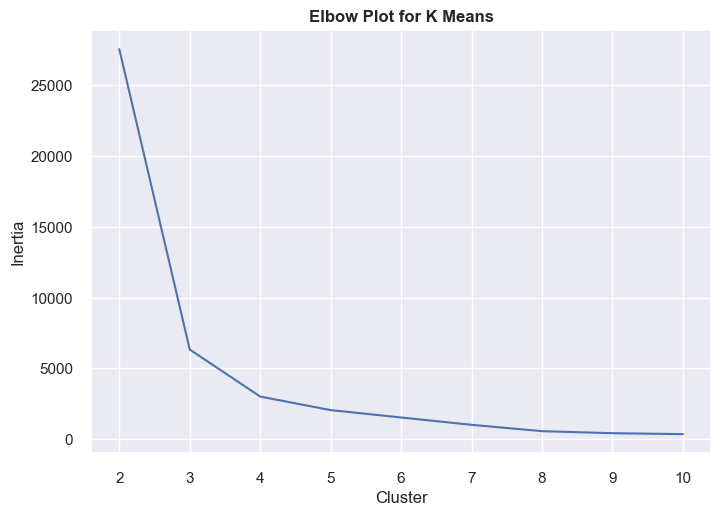

In [63]:
# Elbow Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

inertia = []
silhouettescore = []
len_elbow = 10

for i in range(2, len_elbow+1):
    KM = KMeans(n_clusters=i)
    KM.fit(df_segmentation)
    inertia.append(KM.inertia_)
    
    silhouette = silhouette_score(df_segmentation, KM.labels_)
    silhouettescore.append(silhouette)
    
    
sns.set()
plt.plot(range(2, len_elbow+1), inertia)
plt.ylabel('Inertia')
plt.xlabel('Cluster')
plt.title('Elbow Plot for K Means', weight='bold')

print('Silhouette score :')
print('\n')

for j in range(len(silhouettescore)):
    print(f"Silhouette score cluster {j+2} = {silhouettescore[j]}")

Based on silhouette score and elbow plot above, we can see that model works best at cluster 4. Before i decide to use this cluster, i will plot 4 highest silhouette score and low inertia, which are cluster 3,4,5,6.

/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


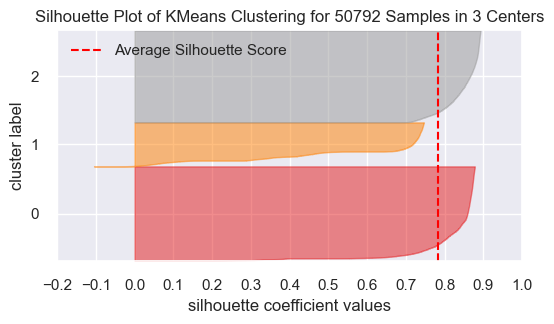

/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


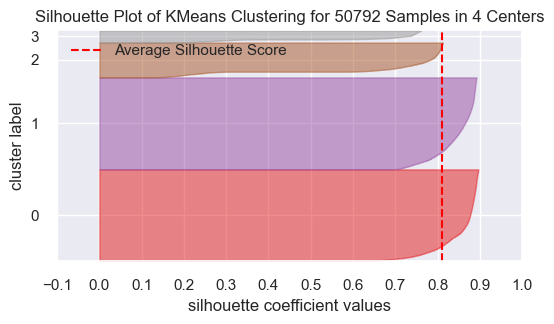

/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


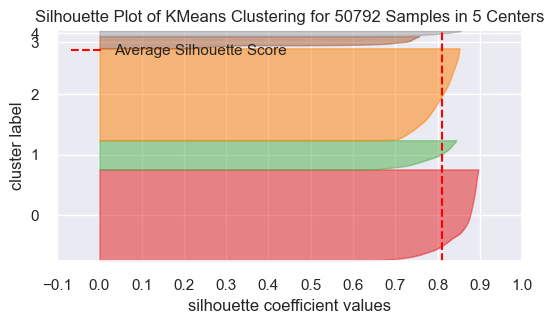

/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


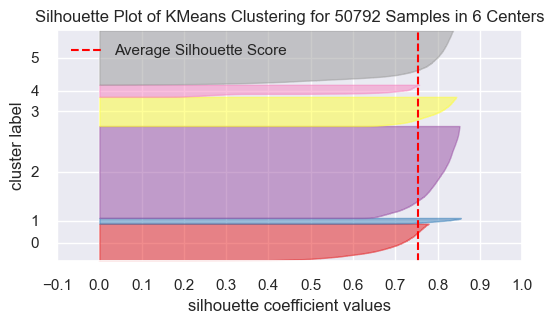

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50792 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
# Cluster 3
plt.figure(figsize=(6,3))
KM_3 = KMeans(n_clusters=3)
KM_3.fit(df_segmentation)
visualizer_3 = SilhouetteVisualizer(KM_3)
visualizer_3.fit(df_segmentation)
visualizer_3.show()

# Cluster 4
plt.figure(figsize=(6,3))
KM_4 = KMeans(n_clusters=4)
KM_4.fit(df_segmentation)
visualizer_4 = SilhouetteVisualizer(KM_4)
visualizer_4.fit(df_segmentation)
visualizer_4.show()

# Cluster 5
plt.figure(figsize=(6,3))
KM_5 = KMeans(n_clusters=5)
KM_5.fit(df_segmentation)
visualizer_5 = SilhouetteVisualizer(KM_5)
visualizer_5.fit(df_segmentation)
visualizer_5.show()

# Cluster 6
plt.figure(figsize=(6,3))
KM_6 = KMeans(n_clusters=6)
KM_6.fit(df_segmentation)
visualizer_6 = SilhouetteVisualizer(KM_6)
visualizer_6.fit(df_segmentation)
visualizer_6.show()

From silhouette plots above, we can see in cluster 3 contain some negative values result. This indicate that there are some values among these 3 clusters which a(i) values more than b(i), so i think we can't consider this cluster. The remaining clusters don't contain negative values result, so i will consider silhouette score for deciding what cluster that i want to use. Based on silhouette score, cluster 4 has the highest score, so i choose **cluster 4** for my model.

Note:
- a(i) is values from computation between values in cluster.
- b(i) is values from computation between values in cluster with other clusters.

**Get prediction using best cluster result**

In [65]:
KM_prediction = KMeans(n_clusters=4)
prediction = KM_prediction.fit_predict(df_segmentation)
prediction

/Users/wahyudwinugraha/miniconda3/envs/environment_39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 3, 2, 0], dtype=int32)

**Visualization**

In [66]:
# Copy dataframe
df_visualization = df_segmentation.copy()
df_visualization

array([[-0.85881549,  0.3511875 ],
       [-0.87625946,  0.47538611],
       [-0.87086653,  0.47387965],
       ...,
       [ 0.80402762,  1.50937641],
       [ 0.05952527, -0.62046022],
       [ 1.8406246 ,  0.44704213]])

In [67]:
# Create dataframe with clustering result
df_visualization = pd.DataFrame({
    'PCA 1' : df_visualization[:,0],
    'PCA 2' : df_visualization[:,1],
    'Cluster' : prediction
})

df_visualization

,PCA 1,PCA 2,Cluster
0,-0.858815,0.351188,1
1,-0.876259,0.475386,1
2,-0.870867,0.473880,1
3,0.275536,-0.880074,2
4,0.224537,-0.856405,2
...,...,...,...
50787,0.101502,-0.710959,2
50788,0.174717,-0.748315,2
50789,0.804028,1.509376,3
50790,0.059525,-0.620460,2


Text(0.5, 1.0, 'Clustering Plot')

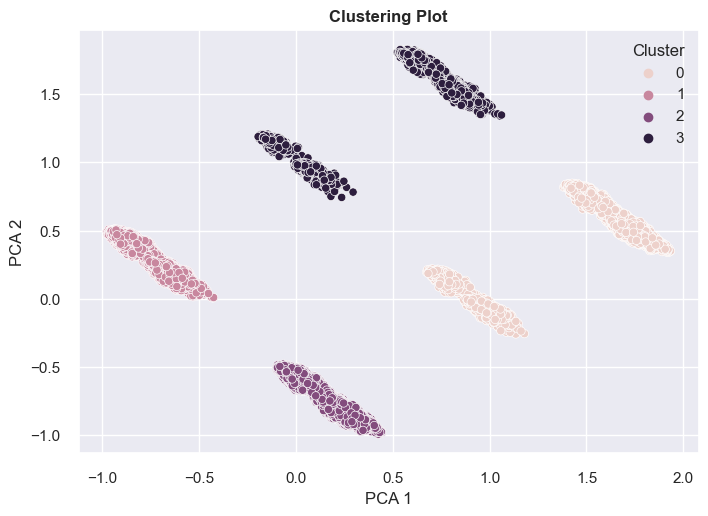

In [68]:
# Plot clustering result
sns.scatterplot(data=df_visualization, x='PCA 1', y='PCA 2', hue='Cluster')
plt.title('Clustering Plot', weight='bold')

From visualization above, we can see our data are well clustered !

**Get relationship between this clustering result and original data**

In [81]:
# Copy dataframe
df_result = df_outliers.copy()
df_result.head()

,Customer ID,City Code,Region Code,Accomodation Ownership,Insurance Type,Age,Married,Plan Code,Policy Duration,Policy Type,Policy Category,Premium Amount,Response
0,81040.0,C3,3029,Rented,Individual,65.0,No,X1,1.0,3.0,22,40171.0,1
1,88349.0,C4,2583,Rented,Individual,19.0,No,X2,1.0,3.0,12,13308.0,0
2,80799.0,C6,4479,Rented,Individual,24.0,No,X2,1.0,3.0,2,41781.0,0
3,72065.0,C11,267,Owned,Individual,66.0,No,X3,14+,2.0,22,15383.0,0
4,84093.0,C2,4534,Owned,Individual,52.0,No,X1,14+,3.0,3,43924.0,0


In [82]:
# Add prediction result into dataframe
df_result['New Segmentation'] = prediction

In [83]:
# Drop customer ID feature
df_result = df_result.drop(columns=['Customer ID'])

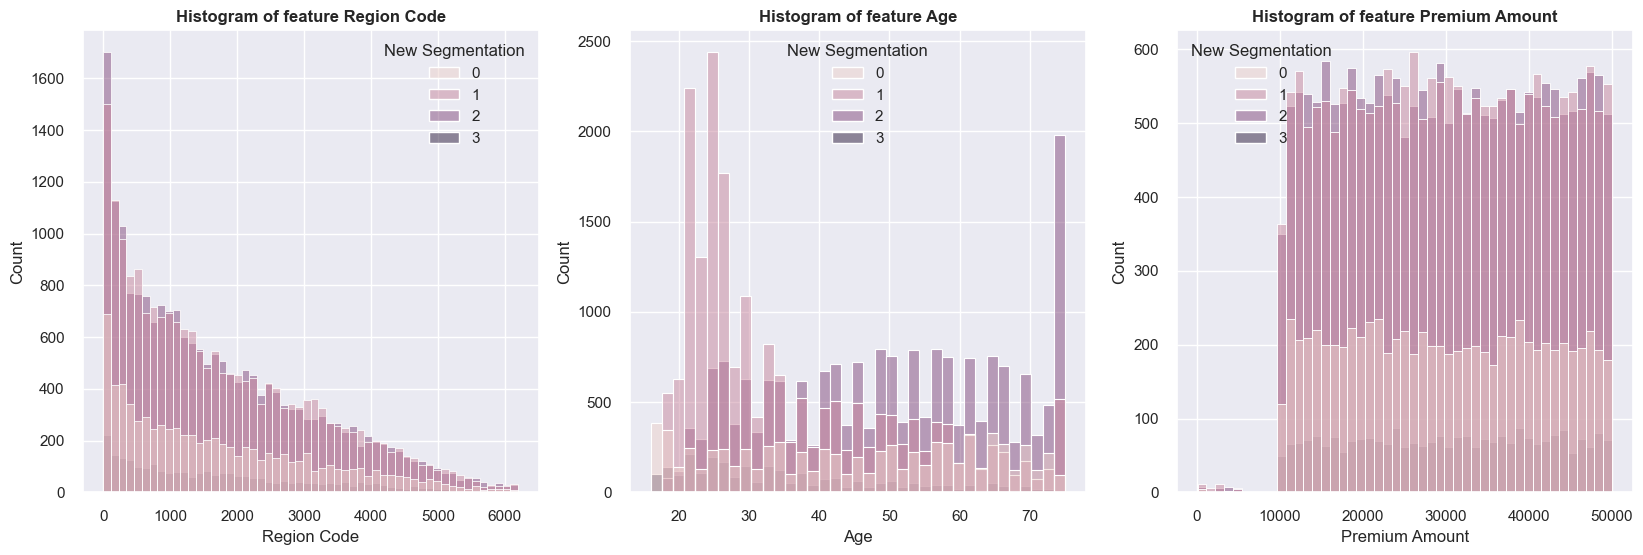

In [84]:
# Relationship of new segmentation feature with numerical features
numerical_features = df_result[['Region Code', 'Age', 'Premium Amount']]
plt.figure(figsize=(20,6))
a = 1

for i in (numerical_features.columns):
    plt.subplot(1,3,a)
    sns.histplot(data=df_result, x=i, hue='New Segmentation')
    plt.title(f"Histogram of feature {i}", weight='bold')
    a = a + 1

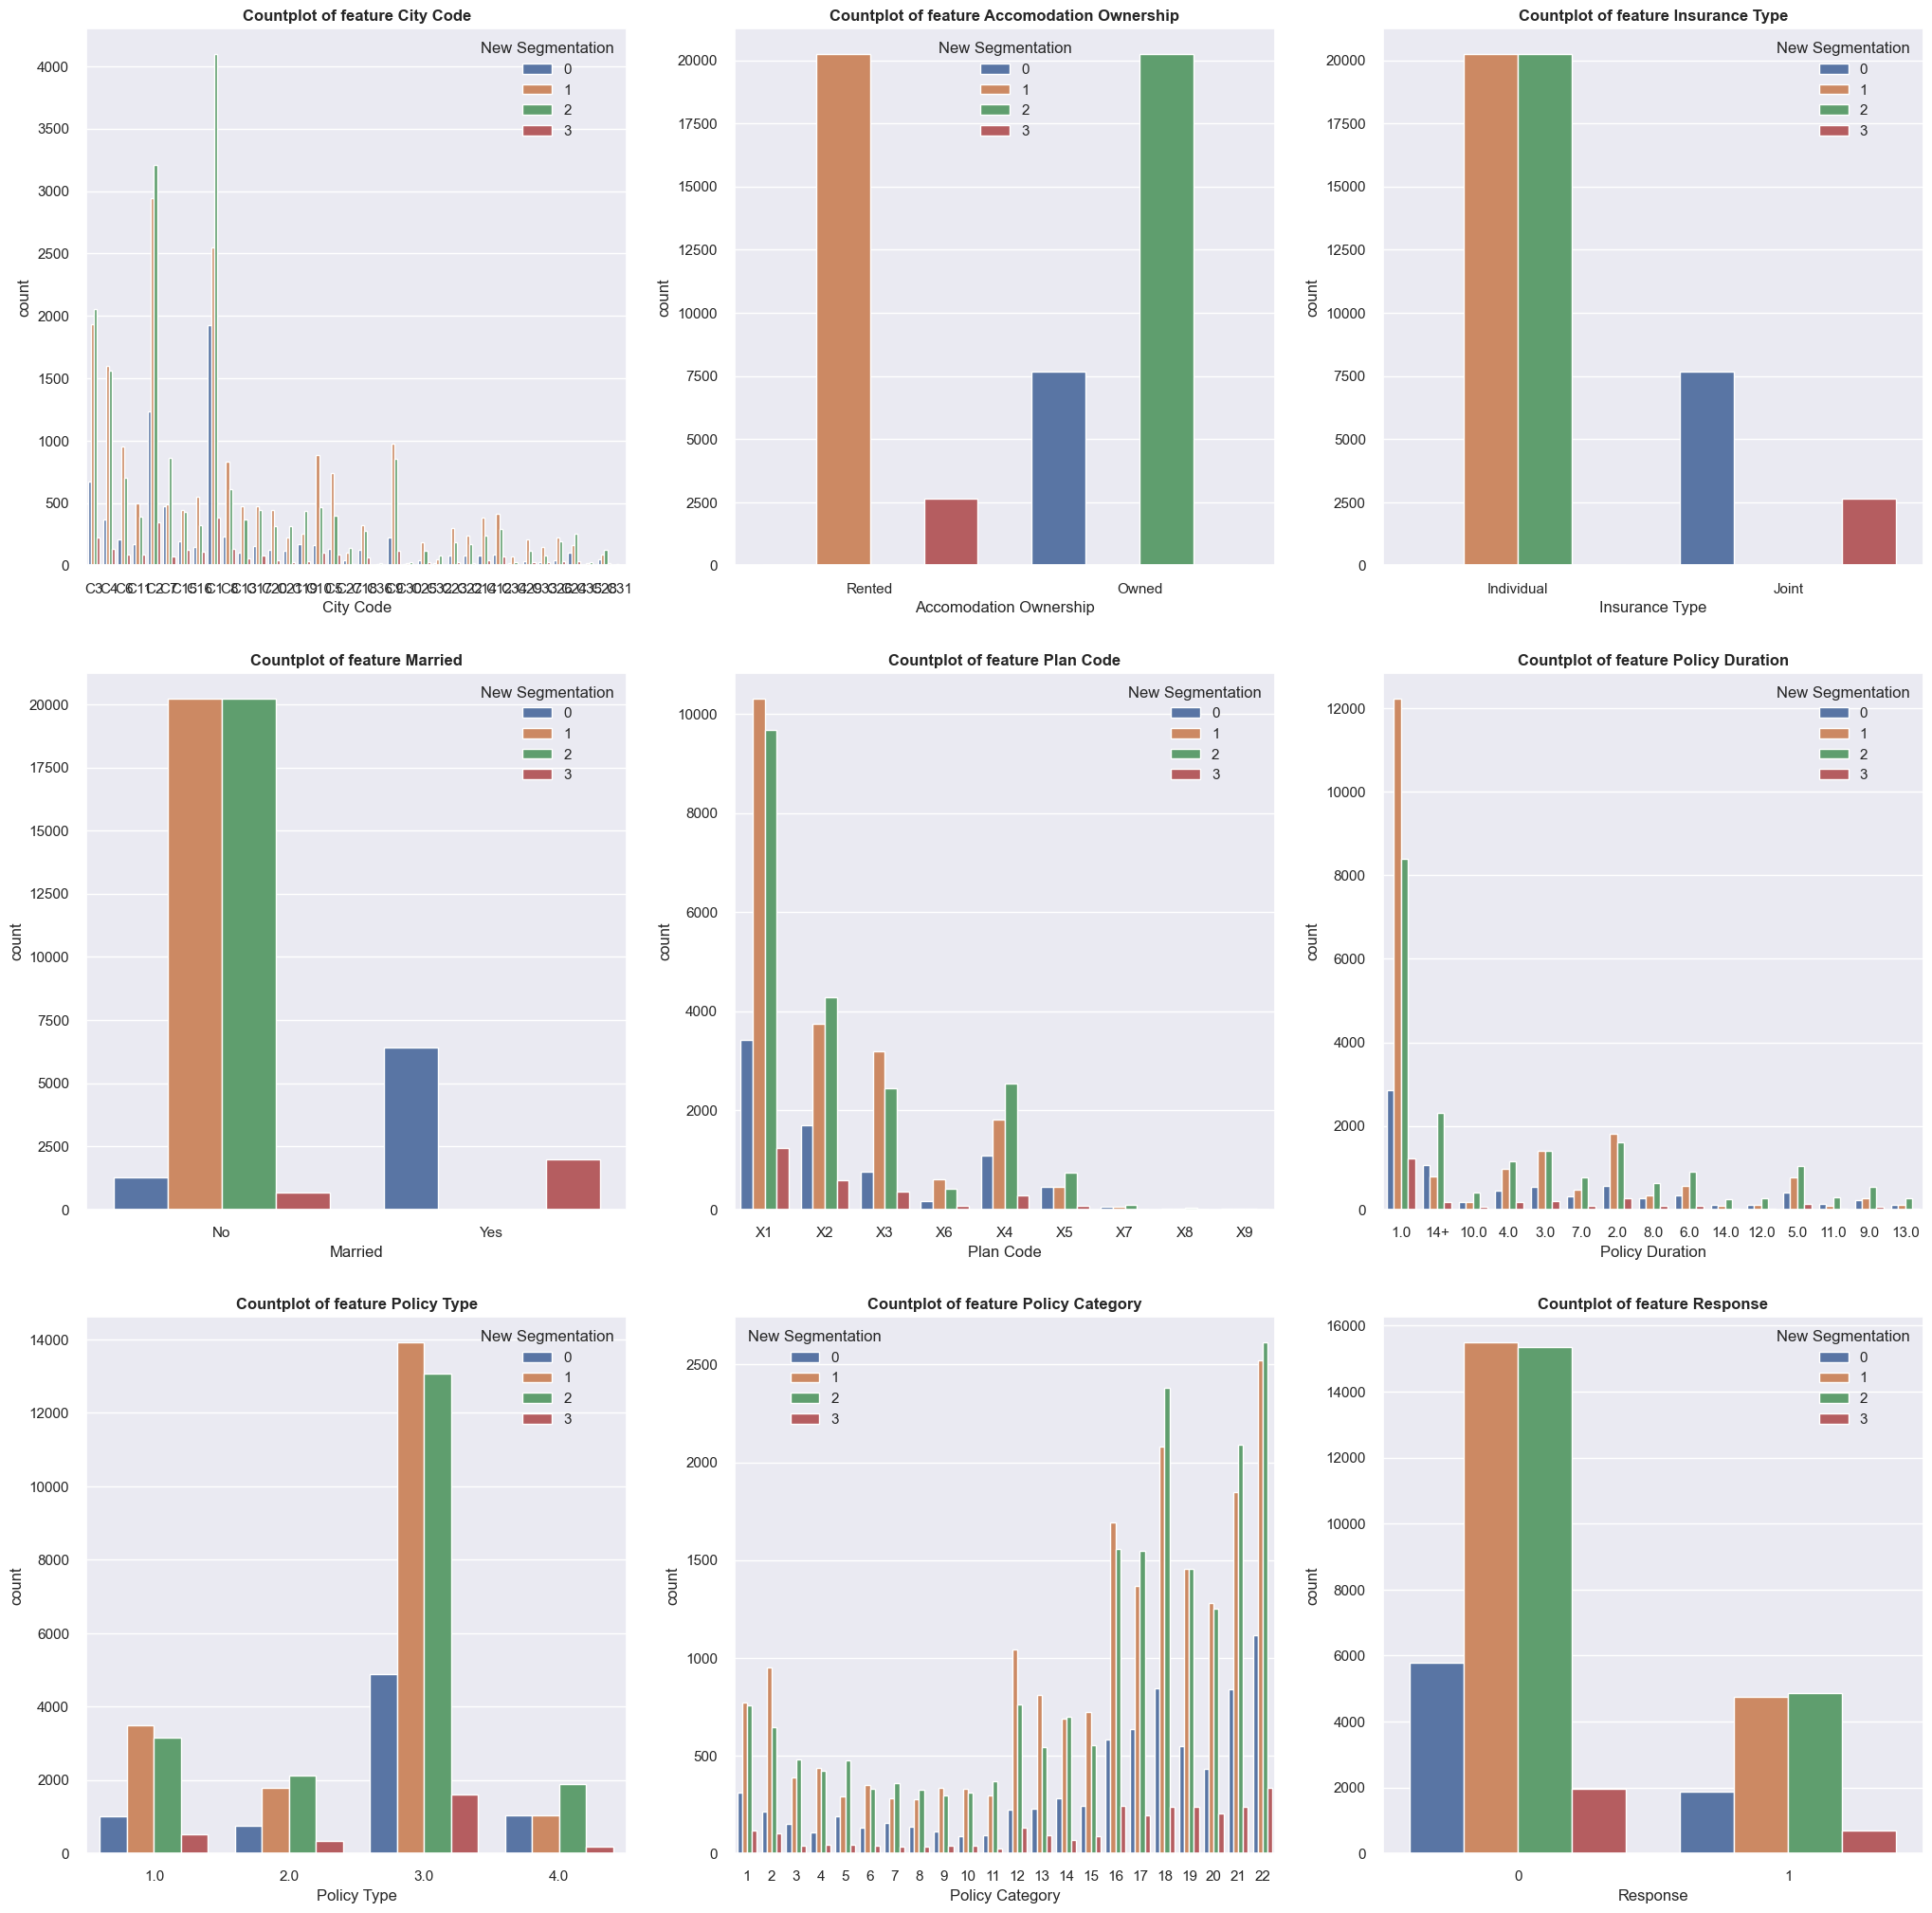

In [85]:
# Relationship of new segmentation feature with categorical features
categorical_features = df_result[['City Code', 'Accomodation Ownership', 'Insurance Type',
                                'Married', 'Plan Code', 'Policy Duration', 'Policy Type',
                                'Policy Category', 'Response']]

plt.figure(figsize=(25,25))
a = 1

for i in (categorical_features.columns):
    plt.subplot(3,3,a)
    sns.countplot(data=df_result, x=i, hue='New Segmentation')
    plt.title(f"Countplot of feature {i}", weight='bold')
    a = a + 1

Based on visualization above, we can see:
- segmentation 0 has high number of rejection policy, short term policy duration, not married, and rented accomodation. I think person in this category has high turnover of this insurance product. So i will name it as **very high risk** customer.
- segmentation 1 also has high number of rejection policy, high number of 1 year policy duration, not married, and owned accomodation. I think person in this category has high turnover but below of segmentation 0. So i will name it as **high risk**
- for segmentation 2 and 3, i think the segmentation 3 is **moderate risk** customer because has many number of people reject policy, has some people with short policy duration, but i think they have stability in life with owned accomodation, joint insurance, and many number of married which also indicating these people have family. And for the last, segmentation 2 is **low risk**.
- for feature new segmentation, i will rename it to be **Risk Profile**.

In [88]:
# Rename new segmentation feature
df_result.rename(columns={'New Segmentation' : 'Risk Profile'}, inplace=True)

In [91]:
risk_profile_replace = {0:'Very High Risk', 1:'High Risk', 2:'Low Risk', 3:'Moderate Risk'}

df_result['Risk Profile'] = df_result['Risk Profile'].replace(risk_profile_replace)

In [92]:
df_result['Risk Profile'].value_counts()

High Risk         20236
Low Risk          20229
Very High Risk     7674
Moderate Risk      2653
Name: Risk Profile, dtype: int64

So we done for customer segmentation !